# Sarcasm classifier with NLP

In [1]:
import json
import tensorflow as tf
import numpy as np
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)
sentences = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [3]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [4]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 30
history= model.fit(training_padded, training_labels, epochs=num_epochs,
          validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/30
625/625 [==============================] - 84s 123ms/step - loss: 0.5792 - accuracy: 0.6801 - val_loss: 0.4640 - val_accuracy: 0.7922
Epoch 2/30
625/625 [==============================] - 77s 123ms/step - loss: 0.4036 - accuracy: 0.8168 - val_loss: 0.4242 - val_accuracy: 0.8077
Epoch 3/30
625/625 [==============================] - 76s 122ms/step - loss: 0.3729 - accuracy: 0.8264 - val_loss: 0.4135 - val_accuracy: 0.7892
Epoch 4/30
625/625 [==============================] - 75s 120ms/step - loss: 0.3718 - accuracy: 0.8295 - val_loss: 0.4204 - val_accuracy: 0.8122
Epoch 5/30
625/625 [==============================] - 75s 120ms/step - loss: 0.3611 - accuracy: 0.8320 - val_loss: 0.4001 - val_accuracy: 0.8131
Epoch 6/30
625/625 [==============================] - 77s 123ms/step - loss: 0.3583 - accuracy: 0.8342 - val_loss: 0.4041 - val_accuracy: 0.8120
Epoch 7/30
625/625 [==============================] - 76s 122ms/step - loss: 0.3520 - accuracy: 0.8382 - val_loss: 0.4260 - val_ac

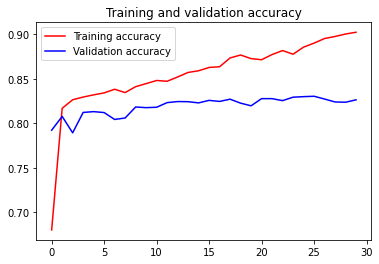

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()